In [128]:
import pandas as pd 
from ms2rescore import plotting
from ms2rescore.percolator import PercolatorIn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Weights analysis

In [129]:
weights_IAA = pd.read_table("data/PXD021398/output_IAA/msms_IAA_searchengine_ms2pip_rt_features.weights", sep="\t")
weights_IAA.drop([1,2,4,5,7], axis=0, inplace=True)
weights_IAA.drop("m0", axis=1, inplace=True)

weights_noIAA = pd.read_table("data/PXD021398/output_noIAA/msms_noIAA_searchengine_ms2pip_rt_features.weights", sep="\t")
weights_noIAA.drop([1,2,4,5,7], axis=0, inplace=True)
weights_noIAA.drop("m0", axis=1, inplace=True)


In [130]:
weights_IAA = weights_IAA.astype(float)
weights_IAA.loc["mean"] = weights_IAA.mean()

weights_noIAA = weights_noIAA.astype(float)
weights_noIAA.loc["mean"] = weights_noIAA.mean()


In [131]:
reindex_list = []
reindex_list.extend(weights_IAA.iloc[3, :71].abs().sort_values(ascending=True).index)
reindex_list.extend(weights_IAA.iloc[3, 71:77].abs().sort_values(ascending=True).index)
reindex_list.extend(weights_IAA.iloc[3, 77:].abs().sort_values(ascending=True).index)


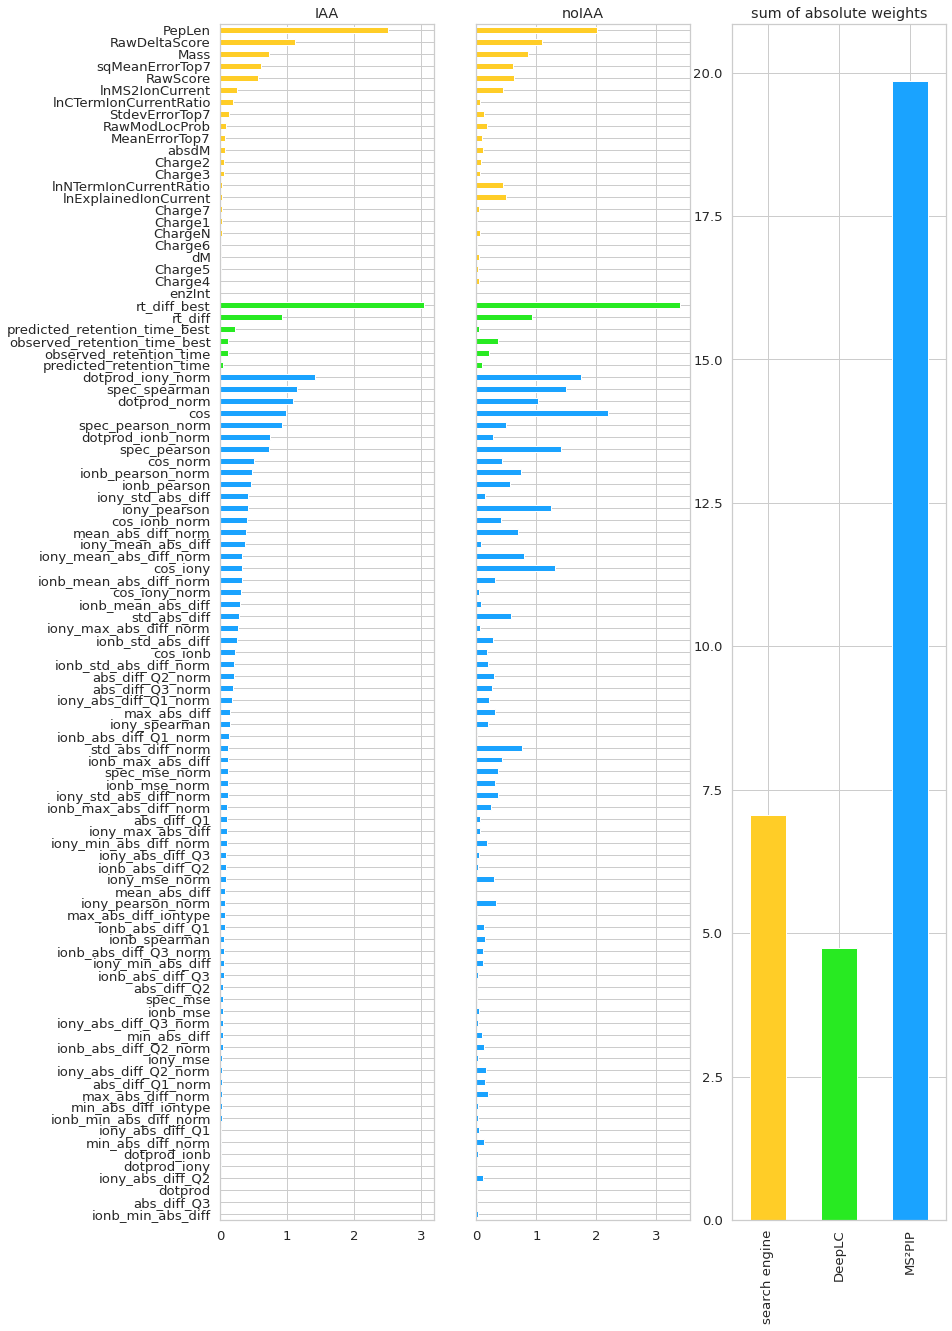

In [132]:
sns.set_style("whitegrid")
feature_cmap = ["#1AA3FF"] * 71 + ["#28ea22"] * 6 + ["#FFCD27"] * 24
col_iterator = zip(list(weights_IAA.columns), feature_cmap)
color_map = dict(col_iterator)

fig = plt.Figure(figsize=(13,22))
ax1 = fig.add_subplot(131)
rowIAA = weights_IAA.iloc[3].abs().reindex(reindex_list)
feature_cmap = [color_map[k] for k in rowIAA.index]
rowIAA.plot(kind="barh", ax=ax1, color=feature_cmap)
ax1.set_title("IAA")
ax2 = fig.add_subplot(132, sharey=ax1)
rownoIAA = weights_noIAA.iloc[3].abs().reindex(reindex_list)
rownoIAA.plot(kind="barh", ax=ax2, color=feature_cmap)
ax2.set_title("noIAA")
ax3 = fig.add_subplot(133)
weight_sum = pd.Series(index=["MS²PIP", "DeepLC", "search engine"], dtype=float)
weight_sum["MS²PIP"] = (sum(weights_IAA.iloc[3, :71].abs()) + sum(weights_noIAA.iloc[3, :71].abs()))/2
weight_sum["DeepLC"] = (sum(weights_IAA.iloc[3, 71:77].abs()) + sum(weights_noIAA.iloc[3, 71:77].abs()))/2
weight_sum["search engine"] = (sum(weights_IAA.iloc[3, 77:].abs()) + sum(weights_noIAA.iloc[3, 77:].abs()))/2
weight_sum_reindexed = weight_sum.reindex(["search engine", "DeepLC", "MS²PIP"])
weight_sum_reindexed.plot(kind="bar", ax=ax3, color=["#FFCD27", "#28ea22","#1AA3FF" ])
ax3.set_title("sum of absolute weights")
#fig.savefig("data/Figures/FigureS2.svg")
fig

# Prosit weights

In [133]:
prosit_weights_IAA = pd.read_table("data/PXD021398/output_IAA/prosit_weights_IAA.csv", sep="\t")
prosit_weights_IAA.drop([1,2,4,5,7], axis=0, inplace=True)
prosit_weights_IAA.drop("m0", axis=1, inplace=True)

prosit_weights_noIAA = pd.read_table("data/PXD021398/output_noIAA/prosit_weights_noIAA.csv", sep="\t")
prosit_weights_noIAA.drop([1,2,4,5,7], axis=0, inplace=True)
prosit_weights_noIAA.drop("m0", axis=1, inplace=True)

In [134]:
col_order = []
col_order.append(prosit_weights_IAA.columns[7])
col_order.extend(prosit_weights_IAA.columns[10:57])

col_order.append(prosit_weights_IAA.columns[8])

col_order.extend(prosit_weights_IAA.columns[:7])
col_order.append(prosit_weights_IAA.columns[9])
col_order.extend(prosit_weights_IAA.columns[57:])


In [135]:
prosit_weights_IAA = prosit_weights_IAA[col_order]
prosit_weights_IAA = prosit_weights_IAA.astype(float)
prosit_weights_IAA.loc["mean"] = prosit_weights_IAA.mean()

prosit_weights_noIAA = prosit_weights_noIAA[col_order]
prosit_weights_noIAA = prosit_weights_noIAA.astype(float)
prosit_weights_noIAA.loc["mean"] = prosit_weights_noIAA.mean()


In [136]:
reindex_list = []
reindex_list.extend(prosit_weights_IAA.iloc[3, :44].abs().sort_values(ascending=True).index)
reindex_list.append('iRT')
reindex_list.extend(prosit_weights_IAA.iloc[3, 50:].abs().sort_values(ascending=True).index)


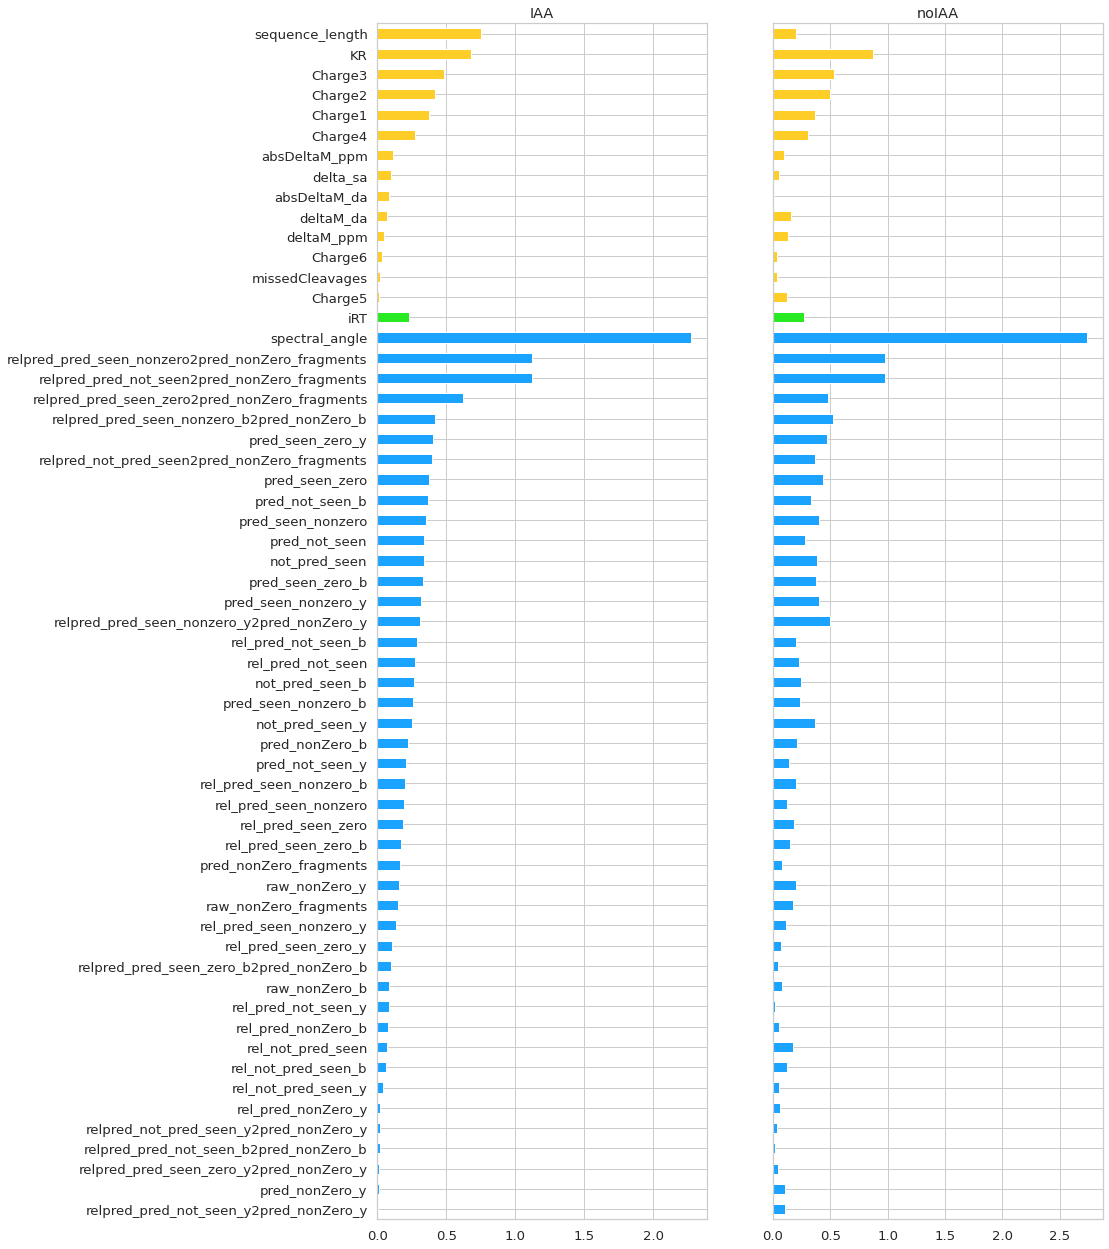

In [137]:
sns.set_style("whitegrid")
feature_cmap = ["#1AA3FF"] * 48 + ["#28ea22"] * 1 +   ["#FFCD27"] * 15
col_iterator = zip(list(prosit_weights_IAA.columns), feature_cmap)
color_map = dict(col_iterator)

fig = plt.Figure(figsize=(13,22))
ax1 = fig.add_subplot(121)
rowIAA = prosit_weights_IAA.iloc[3].abs().reindex(reindex_list)
feature_cmap = [color_map[k] for k in rowIAA.index]
rowIAA.plot(kind="barh", ax=ax1, color=feature_cmap)
ax1.set_title("IAA")
ax2 = fig.add_subplot(122, sharey=ax1)
rownoIAA = prosit_weights_noIAA.iloc[3].abs().reindex(reindex_list)
rownoIAA.plot(kind="barh", ax=ax2, color=feature_cmap)
ax2.set_title("noIAA")
fig

# MS²PIP correlations & DeepLC correlations

In [156]:
with open("data/PXD021398/ms2rescore_accepted_targets_1FDR.pkl", "rb") as fp:
    accepted_targets = pickle.load(fp)

In [157]:
pin_noIAA = PercolatorIn("data/PXD021398/output_noIAA/msms_noIAA_searchengine_ms2pip_rt_features.pin")
pin_noIAA.df["Label"] = ["decoy" if x==-1 else "rejected target" for x in pin_noIAA.df["Label"]]
pin_noIAA.df.loc[(pin_noIAA.df.SpecId.isin(accepted_targets))& (pin_noIAA.df["Label"] != "decoy"), "Label"] = "accepted target"

pin_IAA = PercolatorIn("data/PXD021398/output_IAA/msms_IAA_searchengine_ms2pip_rt_features.pin")
pin_IAA.df["Label"] = ["decoy" if x==-1 else "rejected target" for x in pin_IAA.df["Label"]]
pin_IAA.df.loc[(pin_IAA.df.SpecId.isin(accepted_targets) & ( pin_IAA.df["Label"] != "decoy")), "Label"] = "accepted target"

In [158]:
pin = pd.concat([pin_IAA.df, pin_noIAA.df]).reset_index()
pin.drop("index", axis=1, inplace=True)

In [159]:
pin.head()

,SpecId,Label,ScanNr,spec_pearson_norm,ionb_pearson_norm,iony_pearson_norm,spec_mse_norm,ionb_mse_norm,iony_mse_norm,min_abs_diff_norm,...,Charge7,MeanErrorTop7,sqMeanErrorTop7,StdevErrorTop7,lnExplainedIonCurrent,lnNTermIonCurrentRatio,lnCTermIonCurrentRatio,lnMS2IonCurrent,Peptide,Proteins
0,AC20171009_Broad_HLA_C0801_R1_Rep01.10.10,decoy,0,0.000000,0.000000,0.000000,3.278231,4.055675,2.500787,2.846621e-07,...,0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,WDDDDDDDSASE,REV__WDDDDDDDSASE_
1,AC20171009_Broad_HLA_C0801_R1_Rep01.10002.10002,accepted target,1,0.964760,0.931183,0.990993,0.575769,0.872641,0.278896,2.846621e-07,...,0,-0.000347,1.206294e-07,0.000565,-1.102999,-1.879544,-1.719134,13.877341,LAQAMETAL,uc022byl.1|||uc004dxh.3|||uc004dxi.3|||uc011mp...
2,AC20171009_Broad_HLA_C0801_R1_Rep01.10004.10004,rejected target,2,0.596068,0.682546,0.521842,2.858144,2.565349,3.150939,8.335300e-02,...,0,0.000937,8.777691e-07,0.001401,-0.997336,-2.248348,-1.334482,14.333562,MSGKSHTLQL,tr|G8XSS8|G8XSS8_9BETAMembraneproteinS8OS=Saim...
3,AC20171009_Broad_HLA_C0801_R1_Rep01.10006.10006,decoy,3,-0.103810,0.021081,0.000000,5.024049,4.696960,5.351139,2.846621e-07,...,0,0.002049,4.198542e-06,0.001608,-1.956308,-13.469234,-1.956298,14.528765,APSRCSWRES,REV__APSRCSWRES_
4,AC20171009_Broad_HLA_C0801_R1_Rep01.10008.10008,rejected target,4,0.000000,0.000000,0.000000,1.776544,0.694964,2.858125,2.846621e-07,...,0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,VRRLVAKG,uc003kgz.4


In [160]:
chunks = []
chunksize = 10 ** 6
with pd.read_table("data/PXD021398/msms_full.txt", chunksize=chunksize,usecols=["Raw file", "Scan number", "Modifications", "Charge"]) as reader:
    for parts in reader:
        chunks.append(parts)
msms = pd.concat(chunks)


In [161]:
msms.head()

,Raw file,Scan number,Modifications,Charge
0,C20150414_JGA_HLA_B57_star_3uLof6uL_5e7ceqonco...,19535,Unmodified,2
1,M20150824_JGA_HLA_B4402_biorep1_5e7ceq_AcOHmob...,18925,Unmodified,2
2,M20150626_JGA_HLA_B57_biorep2_5e7ceq_reinject_...,21933,Unmodified,2
3,C20150414_JGA_HLA_B57_3uLof6uL_5e7ceqoncolumn_...,22498,Unmodified,2
4,C20150414_JGA_HLA_B57_3uLof6uL_5e7ceqoncolumn_...,22595,Unmodified,2


In [162]:
msms["SpecId"] = msms["Raw file"] +"." + msms["Scan number"].astype(str) +"." + msms["Scan number"].astype(str)


In [163]:
pin2 = pin.merge(msms[["SpecId", "Modifications", "Charge", "Raw file"]], on="SpecId", how="inner")


In [164]:
pin2.rename({"rt_diff_best": "rt_diff_best_abs"}, axis=1, inplace=True)

In [165]:
pin2.drop(["rt_diff", "observed_retention_time_best", "predicted_retention_time_best"], inplace=True, axis=1)
pin2["rt_diff"] = pin2["observed_retention_time"] - pin2["predicted_retention_time"]
min_rt_diff = pin2[["Peptide", "Modifications","rt_diff", "observed_retention_time", "predicted_retention_time", "Raw file"]].copy()
min_rt_diff = (
            min_rt_diff.sort_values("rt_diff", ascending=True)
            .drop_duplicates(subset=["Peptide", "Modifications", "Raw file"], keep="first")
            .rename(
                columns={
                    "rt_diff": "rt_diff_best",
                    "observed_retention_time": "observed_retention_time_best",
                    "predicted_retention_time": "predicted_retention_time_best",
                }
            )
        )
pin2 = pin2.merge(min_rt_diff, on=["Peptide", "Modifications", "Raw file"], how="inner") 

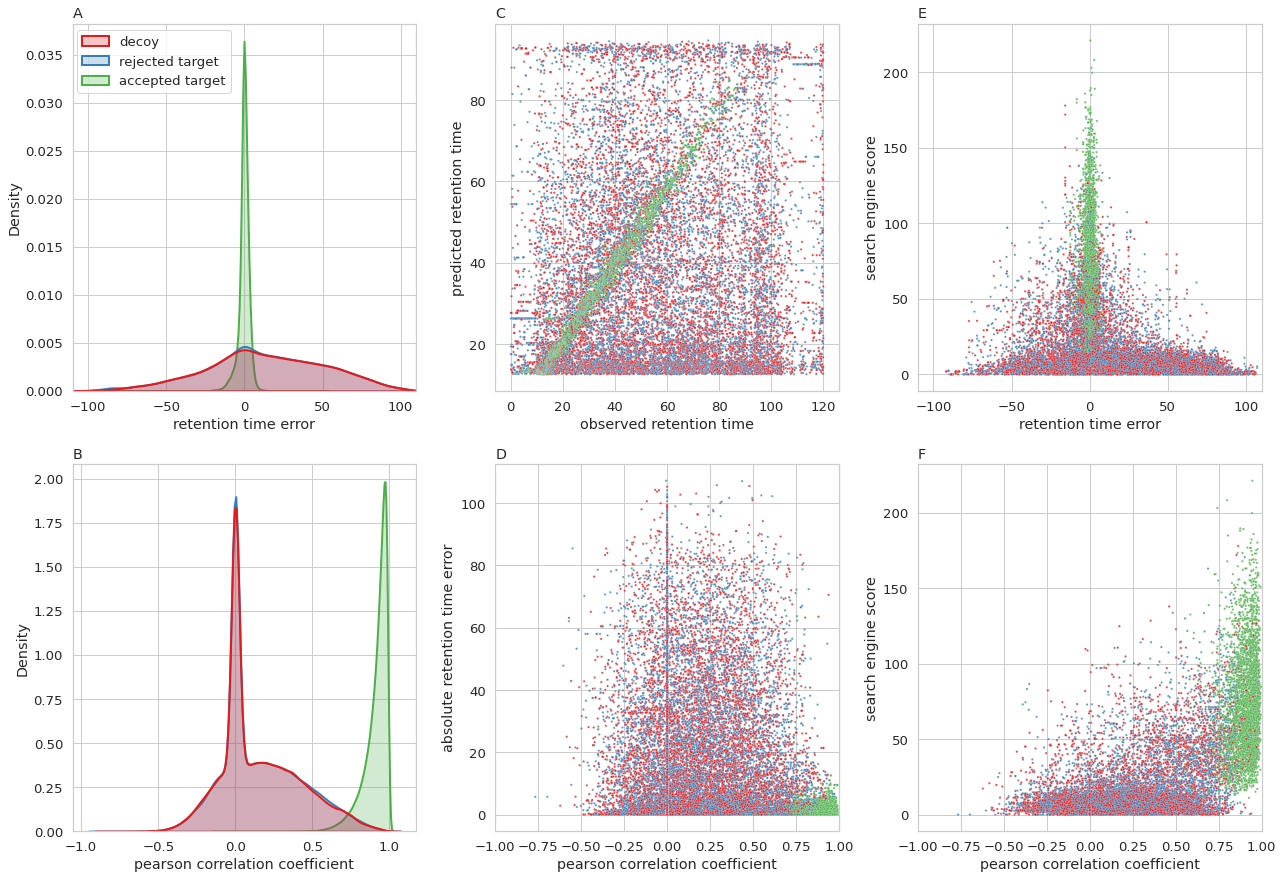

In [166]:
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")
fig = plt.Figure(figsize=(18,18))

ax1 = fig.add_subplot(331)
sns.kdeplot(
    x="rt_diff_best", 
    data=pin2,
    hue="Label",
    shade=True,
    ax=ax1,
    hue_order=["decoy", "rejected target", "accepted target"],
    palette="Set1",
    common_norm=True, 
    linewidth=2, 
    bw_adjust=2,
    )
ax1.get_legend().set_bbox_to_anchor((0.48,1))
ax1.get_legend().set_title("")
ax1.set_title("A", loc="left")
ax1.set_xlim(-110,110)
ax1.set_xlabel("retention time error")


ax2 = fig.add_subplot(332)
sns.scatterplot(
    x="observed_retention_time",
    y="predicted_retention_time", 
    hue="Label",
    data=pin2[pin2.SpecId.str.contains("GN20170531_SK_HLA_C0102_R1_01")],
    palette="Set1", 
    hue_order=["decoy", "rejected target", "accepted target"],
    legend=False,
    ax=ax2,
    alpha=0.8,
    s=5
)
ax2.set_title("C", loc="left")
ax2.set_xlabel("observed retention time")
ax2.set_ylabel("predicted retention time")


ax3 = fig.add_subplot(333)
sns.scatterplot(
    x="rt_diff_best",
    y="RawScore", 
    hue="Label",
    data=pin2[pin2.SpecId.str.contains("GN20170531_SK_HLA_C0102_R1_01")],
    palette="Set1", 
    hue_order=["decoy", "rejected target", "accepted target"],
    legend=False,
    ax=ax3,
    alpha=0.8,
    s=5
)
ax3.set_title("E", loc="left")
ax3.set_xlim(-110,110)
ax3.set_xlabel("retention time error")
ax3.set_ylabel("search engine score")


ax4 = fig.add_subplot(334)
sns.kdeplot(
    x="spec_pearson_norm", 
    data=pin2,
    hue="Label",
    shade=True,
    ax=ax4,
    hue_order=["decoy", "rejected target", "accepted target"],
    palette="Set1",
    common_norm=True, 
    linewidth=2, 
    bw_adjust=2,
    legend=False
    )
ax4.set_title("B", loc="left")
ax4.set_xlabel("pearson correlation coefficient")


ax5 = fig.add_subplot(335)
sns.scatterplot(
    x="spec_pearson_norm",
    y="rt_diff_best_abs", 
    hue="Label",
    data=pin2[pin2.SpecId.str.contains("GN20170531_SK_HLA_C0102_R1_01")],
    palette="Set1", 
    hue_order=["decoy", "rejected target", "accepted target"],
    legend=False,
    ax=ax5,
    alpha=0.8,
    s=5
)
ax5.set_title("D", loc="left")
ax5.set_xlim(-1,1)
ax5.set_xlabel("pearson correlation coefficient")
ax5.set_ylabel("absolute retention time error")

ax6 = fig.add_subplot(336)
sns.scatterplot(
    x="spec_pearson_norm",
    y="RawScore", 
    hue="Label",
    data=pin2[pin2.SpecId.str.contains("GN20170531_SK_HLA_C0102_R1_01")],
    palette="Set1", 
    hue_order=["decoy", "rejected target", "accepted target"],
    legend=False,
    ax=ax6,
    alpha=0.8,
    s=5
)
ax6.set_title("F", loc="left")
ax6.set_xlabel("pearson correlation coefficient")
ax6.set_ylabel("search engine score")
ax6.set_xlim(-1,1)

fig.tight_layout()
#fig.savefig("data/Figures/Figure3.svg")
fig

In [167]:
pin2[(pin2.SpecId.str.contains("GN20170531_SK_HLA_C0102_R1_01")) & (pin2["Label"] =="accepted target" ) & (pin2["Peptide"] =="KGPNRGVI")][["SpecId", "rt_diff_best", "rt_diff_best_abs", "Label", "Peptide", "Modifications"]]

,SpecId,rt_diff_best,rt_diff_best_abs,Label,Peptide,Modifications
981745,GN20170531_SK_HLA_C0102_R1_01.2006.2006,-8.343958,0.036388,accepted target,KGPNRGVI,Unmodified
981746,GN20170531_SK_HLA_C0102_R1_01.2043.2043,-8.343958,0.036388,accepted target,KGPNRGVI,Unmodified
981747,GN20170531_SK_HLA_C0102_R1_01.2086.2086,-8.343958,0.036388,accepted target,KGPNRGVI,Unmodified
981748,GN20170531_SK_HLA_C0102_R1_01.2125.2125,-8.343958,0.036388,accepted target,KGPNRGVI,Unmodified
981749,GN20170531_SK_HLA_C0102_R1_01.2165.2165,-8.343958,0.036388,accepted target,KGPNRGVI,Unmodified
981750,GN20170531_SK_HLA_C0102_R1_01.2202.2202,-8.343958,0.036388,accepted target,KGPNRGVI,Unmodified
981752,GN20170531_SK_HLA_C0102_R1_01.2277.2277,-8.343958,0.036388,accepted target,KGPNRGVI,Unmodified
981753,GN20170531_SK_HLA_C0102_R1_01.2392.2392,-8.343958,0.036388,accepted target,KGPNRGVI,Unmodified
981754,GN20170531_SK_HLA_C0102_R1_01.2431.2431,-8.343958,0.036388,accepted target,KGPNRGVI,Unmodified
981755,GN20170531_SK_HLA_C0102_R1_01.2514.2514,-8.343958,0.036388,accepted target,KGPNRGVI,Unmodified


In [168]:
pin2["peptide type"] = ["tryptic" if (x[-1] == "R") | (x[-1] == "K") else "non tryptic" for x in pin2.Peptide]

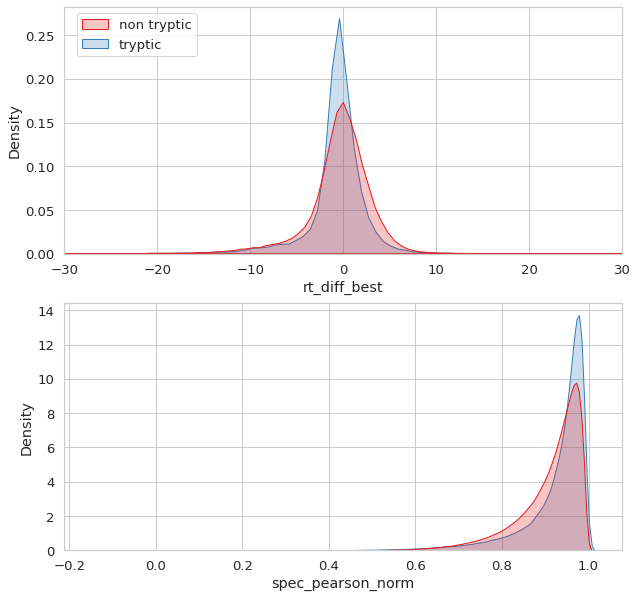

In [169]:
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")
fig = plt.Figure(figsize=(10,10))

ax1 = fig.add_subplot(211)
sns.kdeplot(
    x="rt_diff_best", 
    data=pin2[pin2.Label == "accepted target"],
    hue="peptide type",
    shade=True,
    ax=ax1,
    palette="Set1",
    common_norm=False
    )
ax1.get_legend().set_bbox_to_anchor((0.25,1))
ax1.get_legend().set_title("")
ax1.set_xlim(-30,30)

ax2 = fig.add_subplot(212)
sns.kdeplot(
    x="spec_pearson_norm", 
    data=pin2[pin2.Label == "accepted target"],
    hue="peptide type",
    shade=True,
    ax=ax2,
    palette="Set1",
    common_norm=False
    )
ax2.get_legend().remove()

fig